In [1]:
import glob

import numpy as np
import matplotlib.pyplot as plt

from CCfun import load_backgrounds_from_h5
from CCfun import select_df

In [2]:
%matplotlib inline

plt.rcParams["font.size"] = 15

In [3]:
filenames = glob.glob("/Users/Gonzalo/github/CCdata/Seattle/Seattle*")
filename  = np.random.choice(filenames)

In [4]:
before = load_backgrounds_from_h5(filename, "Before")
after  = load_backgrounds_from_h5(filename, "After" )

In [5]:
before.head()

looparound  crystal  grating  exp_index  slit_width  state  exposure  \
0       False        1        2         -1        1000     -1  0.099976   
1       False        1        2         -1        1000     -1  0.099976   
2       False        1        2         -1        1000     -1  0.099976   
3       False        1        2         -1        1000     -1  0.099976   
4       False        1        2         -1        1000     -1  0.099976   

   ex_wl  power   em_wl  counts  
0   -1.0   -1.0  484.75    3074  
1   -1.0   -1.0  485.25    3100  
2   -1.0   -1.0  485.75    3075  
3   -1.0   -1.0  486.25    3047  
4   -1.0   -1.0  486.75    3078

In [6]:
def clip_counts(df, min=3000, max=3200):
    df = df.copy()
    df["counts"] = np.clip(df.counts.values, min, max)
    return df

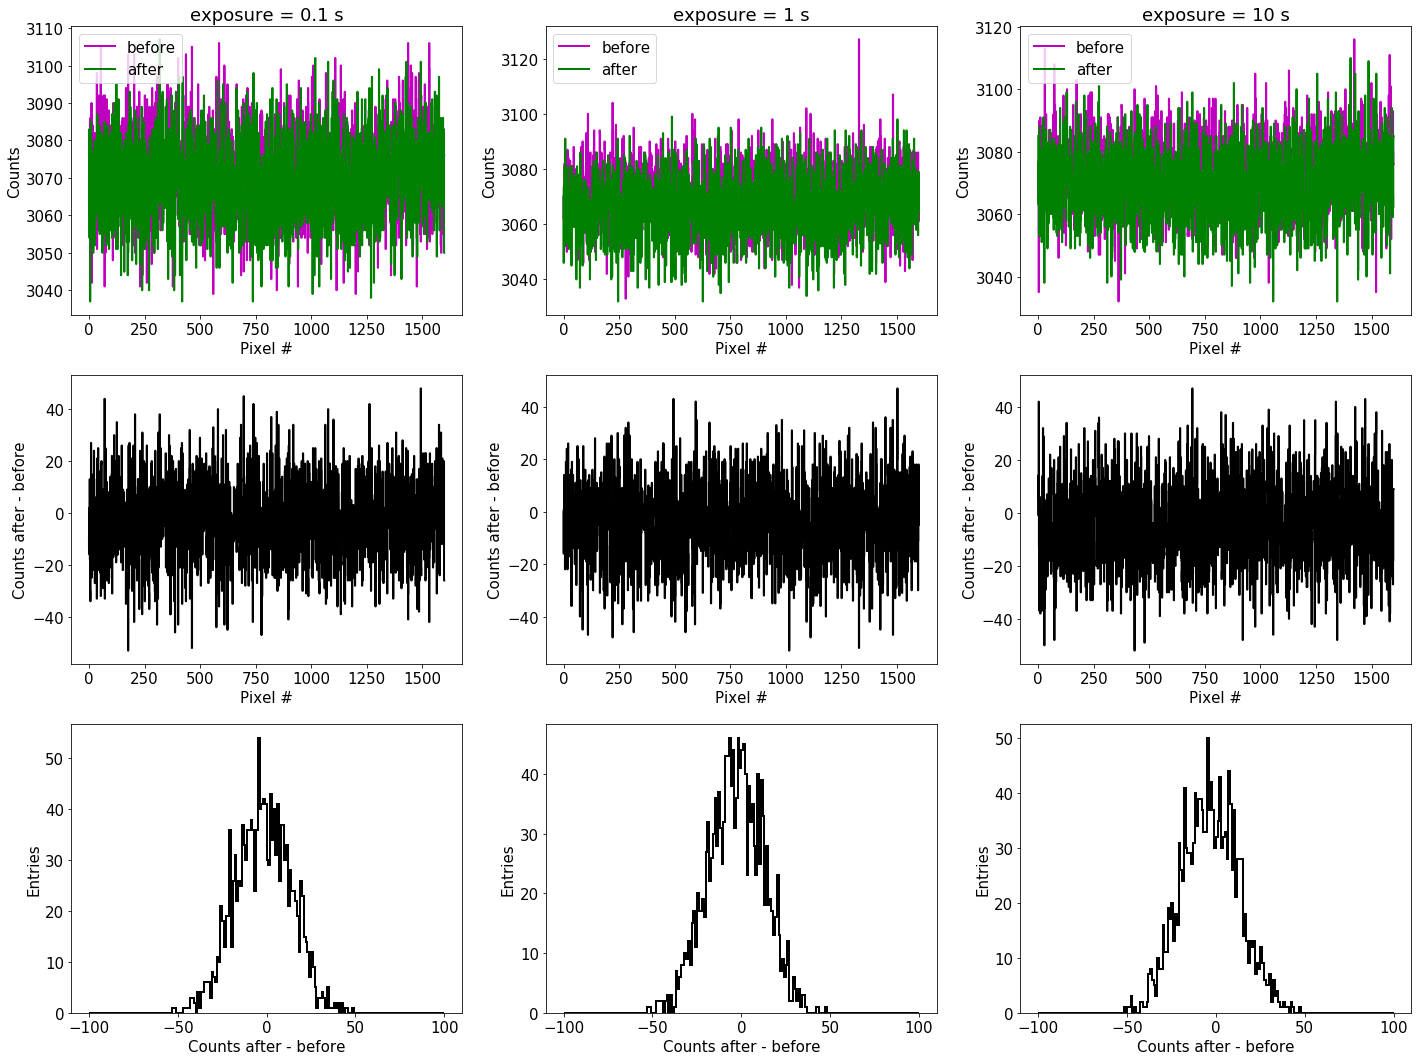

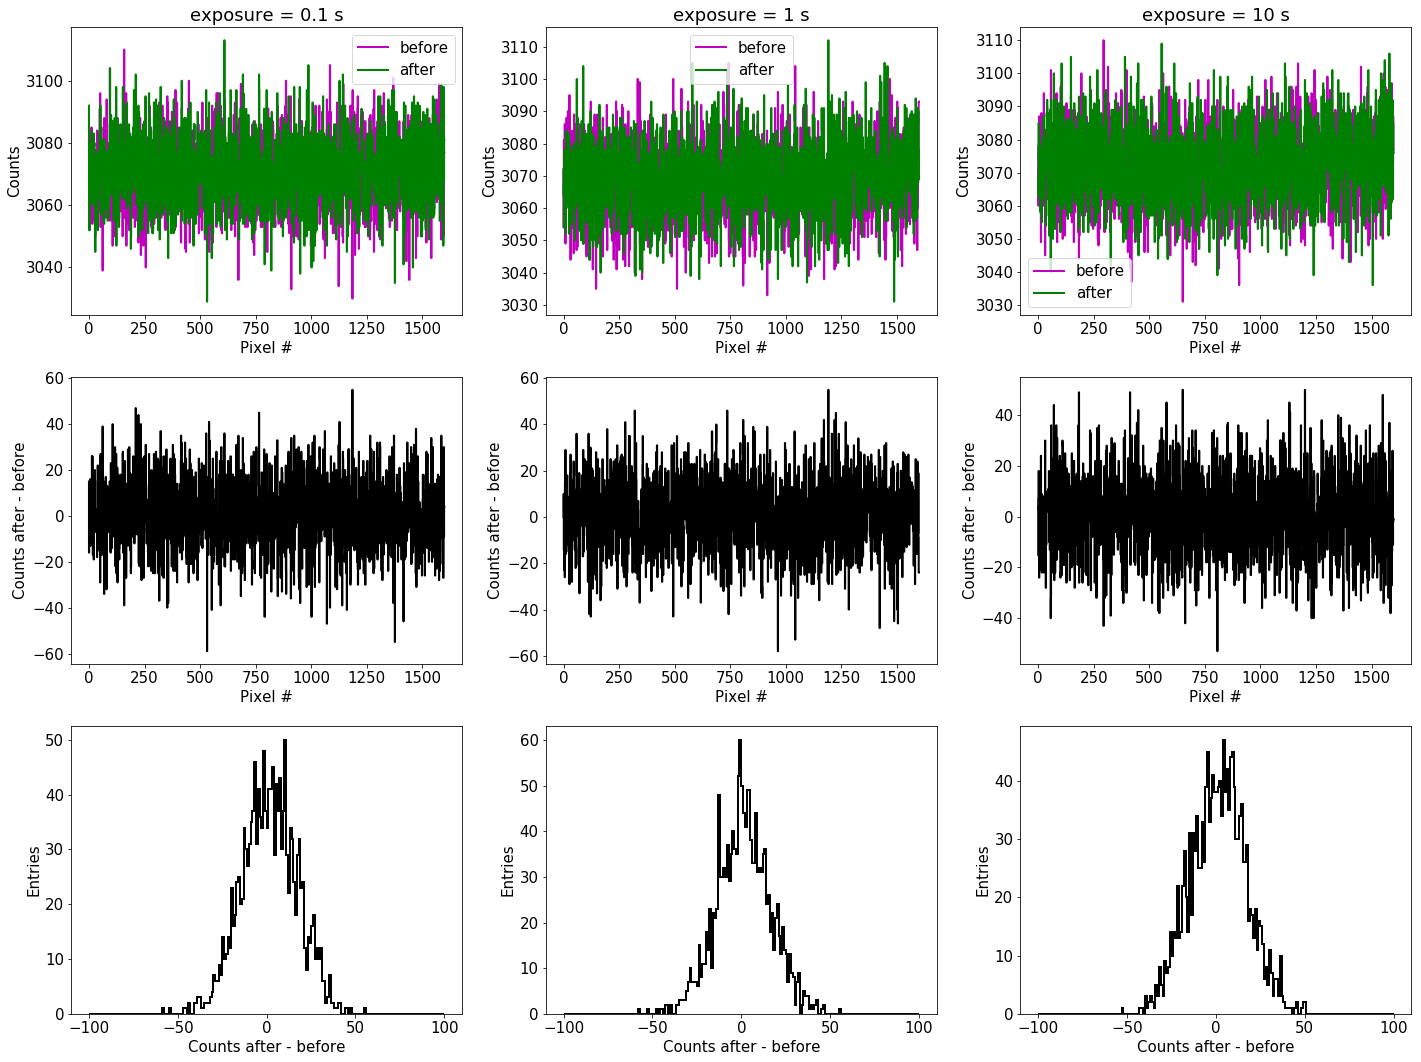

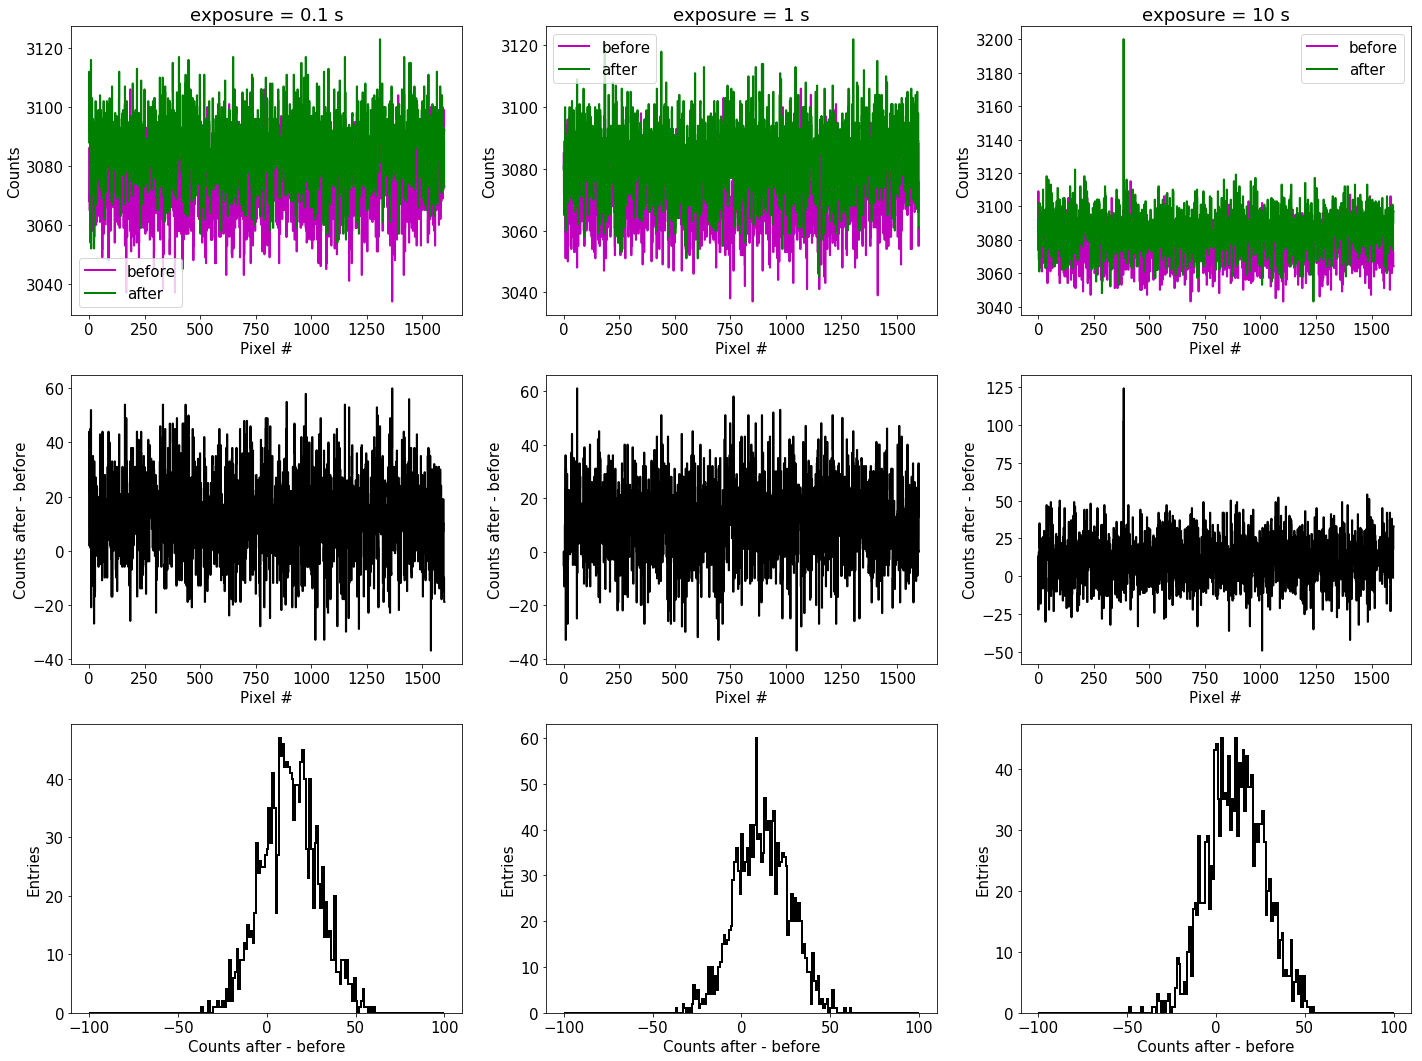

In [7]:
for crystal in range(9, 12):
    plt.figure(figsize=(20, 15), edgecolor="k")
    for k, exposure in enumerate((0.1, 1, 10), start=1):
        selections = dict(exposure=exposure, crystal=crystal)
        bef  = clip_counts(select_df(before, selections))
        aft  = clip_counts(select_df( after, selections))
        dif  = aft.counts.values.astype(np.int64) - bef.counts.values.astype(np.int64)
        bins = np.linspace(-100, 100, 201)

        plt.subplot(3, 3, k)
        plt.plot(bef.counts.values, drawstyle="steps", lw=2, color="m", label="before")
        plt.plot(aft.counts.values, drawstyle="steps", lw=2, color="g", label="after" )

        plt.legend()
        plt.xlabel("Pixel #")
        plt.ylabel("Counts")
        plt.title (f"exposure = {exposure} s")

        plt.subplot(3, 3, k+3)
        plt.plot(dif, drawstyle="steps", lw=2, color="k", label="diff" )
        plt.xlabel("Pixel #")
        plt.ylabel("Counts after - before")

        plt.subplot(3, 3, k+6)
        plt.hist(dif, bins, histtype="step", lw=2, color="k", label="diff")
        plt.xlabel("Counts after - before")
        plt.ylabel("Entries")


    plt.tight_layout()